# **Pre-Processing, Cleaning and Exploratory Data Analysis Metered Load Dataset**

### **1. Data Pre-processing**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

#For Plotting:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 

### **2. Importing Data sets**

In [2]:
data1= pd.read_csv('C:/Users/Sheethal/Downloads/Data Programming Project/hrl_load_metered - 2018.csv')
data2= pd.read_csv('C:/Users/Sheethal/Downloads/Data Programming Project/hrl_load_metered -2019.csv')
data3= pd.read_csv('C:/Users/Sheethal/Downloads/Data Programming Project/hrl_load_metered-2020.csv')
data4= pd.read_csv('C:/Users/Sheethal/Downloads/Data Programming Project/hrl_load_metered-2021.csv')

### **3. Appending the Imported Datasets**

In [3]:
data=pd.concat([data1, data2,data3,data4], axis=0)
data.to_csv('C:/Users/Sheethal/Downloads/Data Programming Project/hrl_load_metered-combined.csv', index=False) 
data_copy = data.copy(deep=True) # Make a copy of the data and the indices
data.head(10)

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,MIDATL,AE,AECO,1261.317,True
1,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPAPT,6787.226,True
2,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPIMP,3158.098,True
3,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPKPT,1141.385,True
4,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPOPT,7421.710,True
5,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AP,AP,7468.999,True
6,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,MIDATL,BC,BC,5018.586,True
7,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,CE,CE,12262.650,True
8,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,DAY,DAY,2306.000,False
9,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,DEOK,DEOK,3796.056,True


### **4. Removing columns that are not required**

In [4]:
data.drop(["datetime_beginning_utc", "nerc_region","mkt_region","is_verified","zone","load_area"], axis = 1, inplace=True)
data.head(10)

,datetime_beginning_ept,mw
0,1/1/2018 12:00:00 AM,1261.317
1,1/1/2018 12:00:00 AM,6787.226
2,1/1/2018 12:00:00 AM,3158.098
3,1/1/2018 12:00:00 AM,1141.385
4,1/1/2018 12:00:00 AM,7421.710
5,1/1/2018 12:00:00 AM,7468.999
6,1/1/2018 12:00:00 AM,5018.586
7,1/1/2018 12:00:00 AM,12262.650
8,1/1/2018 12:00:00 AM,2306.000
9,1/1/2018 12:00:00 AM,3796.056


### **5. Renaming Column Names**

In [5]:
data=data.rename(columns={'datetime_beginning_ept': 'Time_Stamp', 'mw': 'MW_Consumed'})
data.head(10)

,Time_Stamp,MW_Consumed
0,1/1/2018 12:00:00 AM,1261.317
1,1/1/2018 12:00:00 AM,6787.226
2,1/1/2018 12:00:00 AM,3158.098
3,1/1/2018 12:00:00 AM,1141.385
4,1/1/2018 12:00:00 AM,7421.710
5,1/1/2018 12:00:00 AM,7468.999
6,1/1/2018 12:00:00 AM,5018.586
7,1/1/2018 12:00:00 AM,12262.650
8,1/1/2018 12:00:00 AM,2306.000
9,1/1/2018 12:00:00 AM,3796.056


### **6. Writing a Helper function to get some analytics metrics**

In [6]:
class Analysis():

    df = pd.DataFrame()
    
    def __init__(self, df):
     
        self.df = df
        
    def missing_values(self): #to check for missing values
      
        missing_data = self.df[self.df.isna().any(axis=1)]
        
        print("Missing values in the dataset:")
        
        return missing_data
    
    def duplicate_values(self): #to check for duplicate values
        duplicate_data = self.df[self.df.duplicated(subset=None, keep='first')==True]
        
        print("Duplicate values in the dataset:")
        
        return duplicate_data
            
    def summary(self): #to describe the dataset
       
        df = self.df.reset_index() # Reset to include the index
        datetime_is_numeric=True
        summary_data = df.describe(include='all').transpose()
        print("Summary of the Dataset:")
        
        return summary_data
    
    def duplicate_indices(self): #checking if thre are duplicate indices
  
        duplicate_indices = self.df[self.df.index.duplicated()==True]
        
        print("Duplicate indices:")
        
        return duplicate_indices
    
   
    def outliers(self, col): #checks outliers that lie outside 5% to 95% Quartiles
       
        outliers = self.df[~self.df[col].between(self.df[col].quantile(.05), self.df[col].quantile(.95))]
        
        print("Dataset Outliers:")
        
        return outliers
        
    def missing_timeseries_points(self, freq='D'): #to check if there is missing data in continuos time series data
      
        # Creation of a date range
        date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq=freq)

        # Comparing the created date range against dataset
        missing_timeseries = self.df.index[~self.df.index.isin(date_range)]
        
        print("Missing timeseries result:")
        
        return missing_timeseries


### **7. Exploratory Data Analysis and Cleaning**

In [7]:
EDA = Analysis(data)

EDA.summary() 

Summary of the Dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,1043904.0,NaN,NaN,NaN,130512.151094,75379.556598,0.0,65243.75,130487.5,195731.25,263519.0
Time_Stamp,1043904,35060,11/1/2020 1:00:00 AM,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MW_Consumed,1043904.0,NaN,NaN,NaN,6004.251305,16124.32465,0.0,728.5115,2340.966,4745.75075,151570.041


In [8]:
EDA.missing_values() #no missing values found

Missing values in the dataset:


,Time_Stamp,MW_Consumed


In [9]:
EDA.duplicate_values()

Duplicate values in the dataset:


,Time_Stamp,MW_Consumed
169164,8/23/2019 11:00:00 PM,4697.496
48281,3/8/2020 1:00:00 AM,0.000
48291,3/8/2020 1:00:00 AM,0.000
219648,11/1/2020 1:00:00 AM,43.000
43128,3/1/2021 9:00:00 PM,33.000
51881,3/14/2021 1:00:00 AM,0.000
51891,3/14/2021 1:00:00 AM,0.000


In [10]:
EDA.missing_timeseries_points() #no missing timeseries points

Missing timeseries result:


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            262790, 262791, 262792, 262793, 262794, 262795, 262796, 262797,
            262798, 262799],
           dtype='int64', length=1043904)

In [11]:
EDA.duplicate_indices()

Duplicate indices:


,Time_Stamp,MW_Consumed
0,1/1/2019 12:00:00 AM,874.626
1,1/1/2019 12:00:00 AM,3468.835
2,1/1/2019 12:00:00 AM,2546.379
3,1/1/2019 12:00:00 AM,566.355
4,1/1/2019 12:00:00 AM,4908.789
...,...,...
262795,12/31/2021 11:00:00 PM,128.388
262796,12/31/2021 11:00:00 PM,333.778
262797,12/31/2021 11:00:00 PM,102.026
262798,12/31/2021 11:00:00 PM,66.074


#### **Cleaning Data - Removing Duplicates**

In [12]:
data.shape #Before removing duplicates

(1043904, 2)

In [13]:
data = data.drop_duplicates(keep='first') #removing duplicate rows but keeping the first one
data.shape #checking after the elimination of duplicate rows

(1043897, 2)

In [14]:
EDA1 = Analysis(data)
EDA1.duplicate_values() #Duplicates have been removed

Duplicate values in the dataset:


,Time_Stamp,MW_Consumed


#### Cleaning Data - Handling Duplicate indices 

In [15]:
data=data.groupby(['Time_Stamp'],as_index=False).sum()
data

,Time_Stamp,MW_Consumed
0,1/1/2018 10:00:00 AM,229947.240
1,1/1/2018 10:00:00 PM,239804.284
2,1/1/2018 11:00:00 AM,227837.856
3,1/1/2018 11:00:00 PM,232296.530
4,1/1/2018 12:00:00 AM,224576.782
...,...,...
35055,9/9/2021 7:00:00 PM,195082.612
35056,9/9/2021 8:00:00 AM,178138.448
35057,9/9/2021 8:00:00 PM,192036.918
35058,9/9/2021 9:00:00 AM,183226.658


In [16]:
EDA2 = Analysis(data)
EDA2.duplicate_indices() #Duplicate indices have been removed

Duplicate indices:


,Time_Stamp,MW_Consumed


### **Getting Yearwise Data - to use later**

In [17]:
data['Time_Stamp'] = pd.to_datetime(data['Time_Stamp'])
years=[2018,2019,2020,2021]
data_yearwise=data.groupby([data['Time_Stamp'].dt.year],as_index=False).mean() #Average yearly consumption
data_yearwise['Time_Stamp'] = years
data_yearwise

,MW_Consumed,Time_Stamp
0,184211.976383,2018
1,179747.481378,2019
2,172443.190018,2020
3,178715.350236,2021


### **8. Saving cleaned Dataset to a new file**

In [18]:
data.to_csv('C:/Users/Sheethal/Downloads/Data Programming Project/hrl_load_metered-cleaned.csv', index=False) 

### **9. Checking outliers for each feature**


In [19]:
EDA3 = Analysis(data)

EDA3.outliers('Time_Stamp')

Dataset Outliers:


,Time_Stamp,MW_Consumed
0,2018-01-01 10:00:00,229947.240
1,2018-01-01 22:00:00,239804.284
2,2018-01-01 11:00:00,227837.856
3,2018-01-01 23:00:00,232296.530
4,2018-01-01 00:00:00,224576.782
...,...,...
17415,2018-03-09 19:00:00,201919.128
17416,2018-03-09 08:00:00,208274.418
17417,2018-03-09 20:00:00,199967.348
17418,2018-03-09 09:00:00,204293.544


In [20]:
EDA3.outliers('MW_Consumed')

Dataset Outliers:


,Time_Stamp,MW_Consumed
15,2018-01-01 17:00:00,248011.512
17,2018-01-01 18:00:00,253810.602
19,2018-01-01 19:00:00,254833.856
21,2018-01-01 20:00:00,253269.132
23,2018-01-01 21:00:00,248466.886
...,...,...
34972,2018-09-09 02:00:00,128859.232
34974,2018-09-09 03:00:00,126228.368
34976,2018-09-09 04:00:00,125499.162
34978,2018-09-09 05:00:00,126450.064


### **10. Creating Heatmaps**

#### For Weekly data:

In [23]:
weekdays_data=data
weekdays_data['Weekday_Name'] = weekdays_data['Time_Stamp'].apply(lambda x: x.dayofweek)
mapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekdays_data['Weekday_Name'] = weekdays_data['Weekday_Name'].map(mapping)
weekdays_data

,Time_Stamp,MW_Consumed,Weekday_Name
0,2018-01-01 10:00:00,229947.240,Monday
1,2018-01-01 22:00:00,239804.284,Monday
2,2018-01-01 11:00:00,227837.856,Monday
3,2018-01-01 23:00:00,232296.530,Monday
4,2018-01-01 00:00:00,224576.782,Monday
...,...,...,...
35055,2021-09-09 19:00:00,195082.612,Thursday
35056,2021-09-09 08:00:00,178138.448,Thursday
35057,2021-09-09 20:00:00,192036.918,Thursday
35058,2021-09-09 09:00:00,183226.658,Thursday


In [24]:
heatmap_data=weekdays_data
heatmap_data['Year'] =  heatmap_data['Time_Stamp'].dt.year
heatmap_data

,Time_Stamp,MW_Consumed,Weekday_Name,Year
0,2018-01-01 10:00:00,229947.240,Monday,2018
1,2018-01-01 22:00:00,239804.284,Monday,2018
2,2018-01-01 11:00:00,227837.856,Monday,2018
3,2018-01-01 23:00:00,232296.530,Monday,2018
4,2018-01-01 00:00:00,224576.782,Monday,2018
...,...,...,...,...
35055,2021-09-09 19:00:00,195082.612,Thursday,2021
35056,2021-09-09 08:00:00,178138.448,Thursday,2021
35057,2021-09-09 20:00:00,192036.918,Thursday,2021
35058,2021-09-09 09:00:00,183226.658,Thursday,2021


In [25]:
heatmap_data = heatmap_data.groupby(['Year', 'Weekday_Name']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# Pivot to a form a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='MW_Consumed')

# Reorder the columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

heatmap_data.head(100)

Weekday_Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2018,2.384234e+08,2.388424e+08,2.391741e+08,2.371080e+08,2.319406e+08,2.160812e+08,2.119429e+08
2019,2.283943e+08,2.341914e+08,2.328594e+08,2.311360e+08,2.264138e+08,2.121672e+08,2.092460e+08
2020,2.180175e+08,2.205203e+08,2.261203e+08,2.256583e+08,2.184261e+08,2.051634e+08,2.006626e+08
2021,2.294287e+08,2.314859e+08,2.299447e+08,2.271615e+08,2.278247e+08,2.104864e+08,2.090359e+08


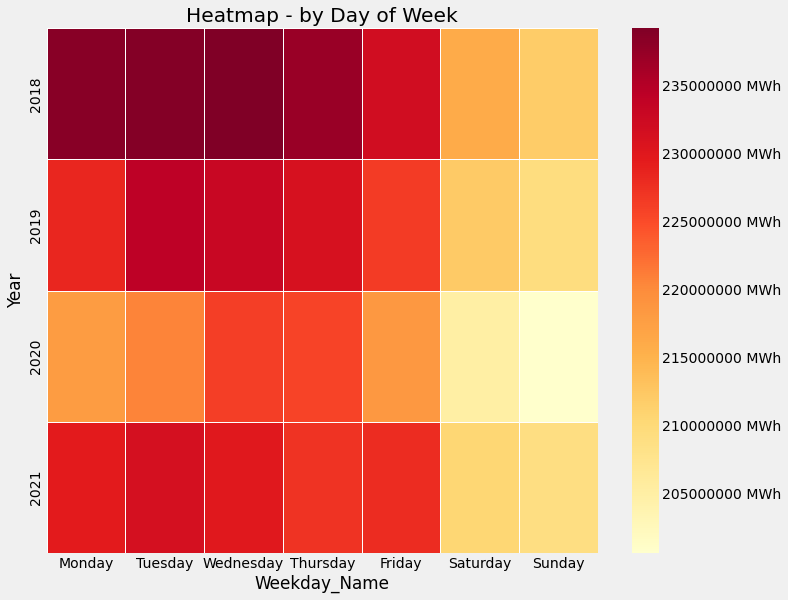

In [26]:
# Visualise electricity load via Heatmap for weekly data
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')
plt.show()

**We can see there is lower electricity usage over the weekends. Most businesses/stores are closed during weekends and hence, this makes sense.**

#### For Hourly Data:

In [27]:
heatmap_data=weekdays_data
heatmap_data['Hour'] =  heatmap_data['Time_Stamp'].dt.hour
heatmap_data

,Time_Stamp,MW_Consumed,Weekday_Name,Year,Hour
0,2018-01-01 10:00:00,229947.240,Monday,2018,10
1,2018-01-01 22:00:00,239804.284,Monday,2018,22
2,2018-01-01 11:00:00,227837.856,Monday,2018,11
3,2018-01-01 23:00:00,232296.530,Monday,2018,23
4,2018-01-01 00:00:00,224576.782,Monday,2018,0
...,...,...,...,...,...
35055,2021-09-09 19:00:00,195082.612,Thursday,2021,19
35056,2021-09-09 08:00:00,178138.448,Thursday,2021,8
35057,2021-09-09 20:00:00,192036.918,Thursday,2021,20
35058,2021-09-09 09:00:00,183226.658,Thursday,2021,9


In [28]:
hmd=heatmap_data
heatmap_data = heatmap_data.groupby(['Year', 'Hour']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Hour', values='MW_Consumed')

heatmap_data.head(100)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2018,5.969314e+07,5.762191e+07,5.604220e+07,5.568363e+07,5.628590e+07,5.870129e+07,6.274265e+07,6.594820e+07,6.772521e+07,6.900846e+07,...,7.247957e+07,7.284524e+07,7.375262e+07,7.504191e+07,7.521490e+07,7.454368e+07,7.355258e+07,7.131274e+07,6.731698e+07,6.303548e+07
2019,5.818152e+07,5.621841e+07,5.469753e+07,5.437314e+07,5.498674e+07,5.734030e+07,6.126345e+07,6.436204e+07,6.604240e+07,6.719987e+07,...,7.070868e+07,7.117777e+07,7.217347e+07,7.348507e+07,7.362126e+07,7.285500e+07,7.177722e+07,6.950842e+07,6.560824e+07,6.147701e+07
2020,5.640382e+07,5.450781e+07,5.301667e+07,5.264498e+07,5.310891e+07,5.501552e+07,5.815213e+07,6.106485e+07,6.303383e+07,6.438975e+07,...,6.811988e+07,6.843279e+07,6.934930e+07,7.081553e+07,7.102839e+07,7.016170e+07,6.884941e+07,6.660009e+07,6.311413e+07,5.942242e+07
2021,5.833944e+07,5.644574e+07,5.497099e+07,5.461130e+07,5.512248e+07,5.715114e+07,6.050941e+07,6.347853e+07,6.531228e+07,6.650078e+07,...,7.035790e+07,7.080363e+07,7.176121e+07,7.307260e+07,7.319816e+07,7.229411e+07,7.096232e+07,6.867338e+07,6.510241e+07,6.135603e+07


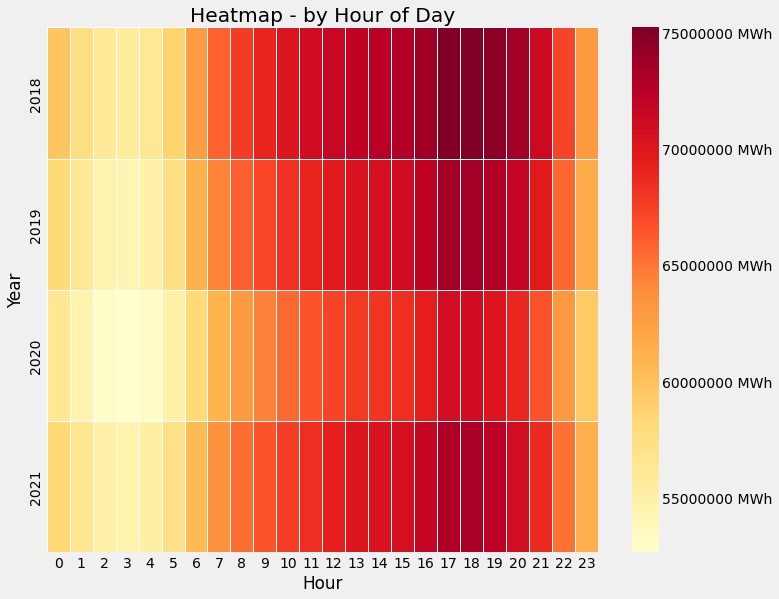

In [29]:
# Visualise electricity load via Heatmap for hourly data
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Hour of Day')
plt.show()

**As we can see between 10am to 9pm the load is the highest**

#### Seasonality by month:

In [30]:
hmd1=hmd
hmd['Month'] = hmd['Time_Stamp'].apply(lambda x: x.month)
mapping = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
hmd['Month'] = hmd['Month'].map(mapping)
hmd

,Time_Stamp,MW_Consumed,Weekday_Name,Year,Hour,Month
0,2018-01-01 10:00:00,229947.240,Monday,2018,10,January
1,2018-01-01 22:00:00,239804.284,Monday,2018,22,January
2,2018-01-01 11:00:00,227837.856,Monday,2018,11,January
3,2018-01-01 23:00:00,232296.530,Monday,2018,23,January
4,2018-01-01 00:00:00,224576.782,Monday,2018,0,January
...,...,...,...,...,...,...
35055,2021-09-09 19:00:00,195082.612,Thursday,2021,19,September
35056,2021-09-09 08:00:00,178138.448,Thursday,2021,8,September
35057,2021-09-09 20:00:00,192036.918,Thursday,2021,20,September
35058,2021-09-09 09:00:00,183226.658,Thursday,2021,9,September


In [31]:
hmd = hmd.groupby(['Year', 'Month']).sum()

# Reset index
hmd = hmd.reset_index()

# Pivot it to a uniform data format for heatmaps
hmd = hmd.pivot(index='Year', columns='Month', values='MW_Consumed')

# Reorder columns
hmd = hmd[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

hmd.head(10)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2018,1.543040e+08,1.224825e+08,1.323223e+08,1.160027e+08,1.266863e+08,1.352390e+08,1.525771e+08,1.550371e+08,1.332010e+08,1.229162e+08,1.261410e+08,1.366036e+08
2019,1.480995e+08,1.269377e+08,1.306334e+08,1.100689e+08,1.201530e+08,1.286574e+08,1.596690e+08,1.469834e+08,1.291474e+08,1.157298e+08,1.235509e+08,1.347778e+08
2020,1.364436e+08,1.258108e+08,1.187803e+08,1.035772e+08,1.088860e+08,1.297593e+08,1.605900e+08,1.476292e+08,1.195400e+08,1.121418e+08,1.141441e+08,1.372661e+08
2021,1.414898e+08,1.323127e+08,1.223418e+08,1.100001e+08,1.170729e+08,1.382923e+08,1.517932e+08,1.558384e+08,1.270068e+08,1.171327e+08,1.222128e+08,1.298743e+08


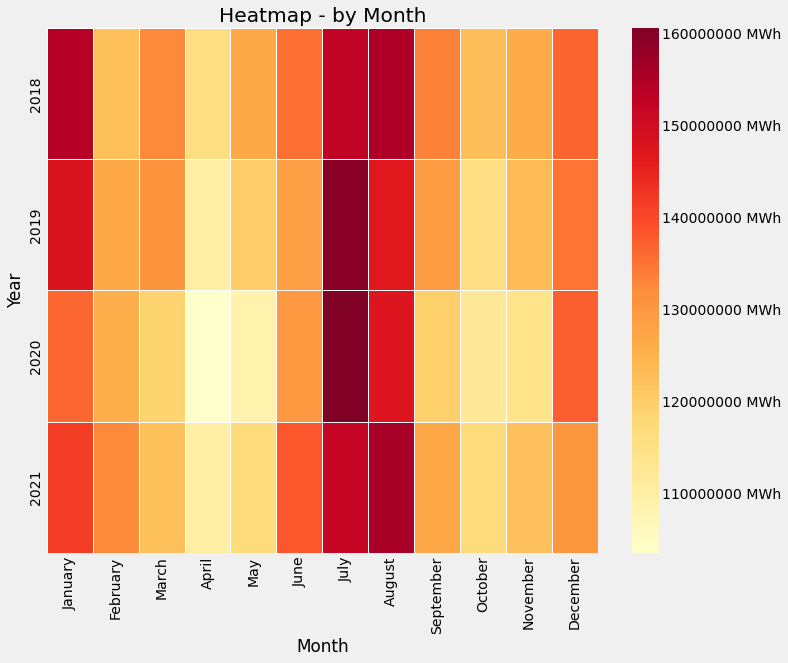

In [32]:
# Visualise electricity load via Heatmap for monthly data
sns.heatmap(hmd, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Month')
plt.show()

#### As we can see the months of June to August have the highest electricty consumption. This makes sense as it marks the peak of summer season in the PJM Region (Air Conditioners, Refrigerators and Fans could be used more)

### **11. Initial Visualizations**

<AxesSubplot:xlabel='Year', ylabel='MW_Consumed'>

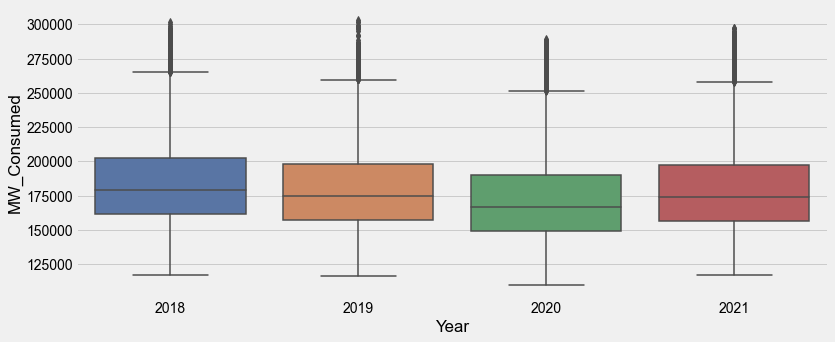

In [33]:
#Box Plot
fig, ax = plt.subplots(figsize=(12,5))
sns.set(style='whitegrid')
sns.boxplot(x="Year",y="MW_Consumed",data=hmd1)
plt.show()

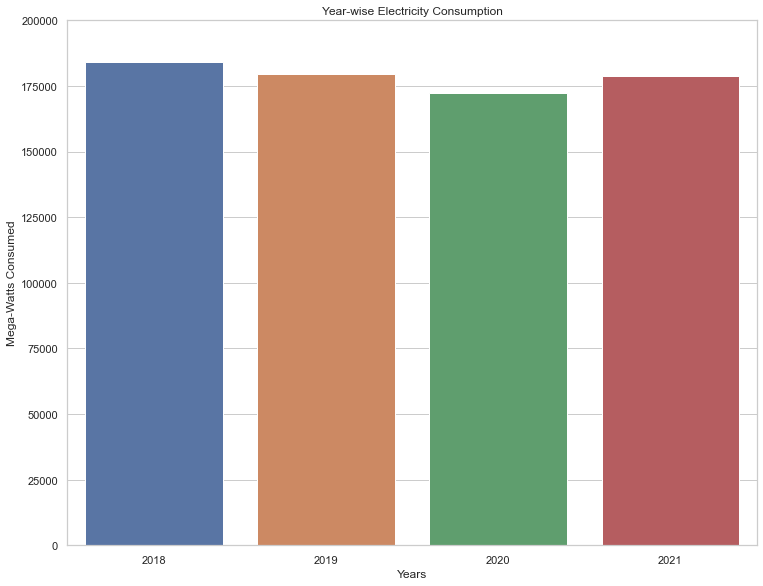

In [35]:
#Bar Plot
plt.title("Year-wise Electricity Consumption")

ax=sns.barplot(x = 'Time_Stamp',y = 'MW_Consumed',data = data_yearwise)
ax.set(xlabel='Years', ylabel='Mega-Watts Consumed')
plt.ylim(0, 200000)
plt.show()

### **12. Pandas Profiling on initial dataset before cleaning to check for any other insights**

In [40]:
data_copy2 = data_copy.copy(deep=True) 
data_copy# It is the initial dataset which we had made a deep copy of

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,MIDATL,AE,AECO,1261.317,True
1,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPAPT,6787.226,True
2,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPIMP,3158.098,True
3,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPKPT,1141.385,True
4,1/1/2018 5:00:00 AM,1/1/2018 12:00:00 AM,RFC,WEST,AEP,AEPOPT,7421.710,True
...,...,...,...,...,...,...,...,...
262795,1/1/2022 4:00:00 AM,12/31/2021 11:00:00 PM,RFC,MIDATL,RECO,RECO,128.388,False
262796,1/1/2022 4:00:00 AM,12/31/2021 11:00:00 PM,RFC,MIDATL,PEP,SMECO,333.778,True
262797,1/1/2022 4:00:00 AM,12/31/2021 11:00:00 PM,RFC,MIDATL,PL,UGI,102.026,True
262798,1/1/2022 4:00:00 AM,12/31/2021 11:00:00 PM,RFC,MIDATL,AE,VMEU,66.074,True


In [41]:
from pandas_profiling import ProfileReport
data_copy.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]